In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
from constants.paths_const import DATA_PATH, ANNOTATIONS_ORG_FILE

In [2]:
train_imgs_path = os.path.join(DATA_PATH, "train")
train_annotations_path = os.path.join(DATA_PATH, "train", ANNOTATIONS_ORG_FILE)

In [3]:
# Read annotations file
with open(train_annotations_path, 'r') as f:
    annotations_data = json.load(f)

# Get category from annotations file
category_mapping = {cat['id']: cat['name'] for cat in annotations_data['categories']}
print(category_mapping)

{0: 'cards', 1: '10C', 2: '10D', 3: '10H', 4: '10S', 5: '2C', 6: '2D', 7: '2H', 8: '2S', 9: '3C', 10: '3D', 11: '3H', 12: '3S', 13: '4C', 14: '4D', 15: '4H', 16: '4S', 17: '5C', 18: '5D', 19: '5H', 20: '5S', 21: '6C', 22: '6D', 23: '6H', 24: '6S', 25: '7C', 26: '7D', 27: '7H', 28: '7S', 29: '8C', 30: '8D', 31: '8H', 32: '8S', 33: '9C', 34: '9D', 35: '9H', 36: '9S', 37: 'AC', 38: 'AD', 39: 'AH', 40: 'AS', 41: 'JC', 42: 'JD', 43: 'JH', 44: 'JS', 45: 'KC', 46: 'KD', 47: 'KH', 48: 'KS', 49: 'QC', 50: 'QD', 51: 'QH', 52: 'QS'}


In [4]:
image_ids = []
file_names = []
category_names = []
bounding_boxes = []

for img in annotations_data['images']:
    # Get information from image key in annotations file
    image_ids.append(img['id'])
    file_names.append(img['file_name'])

    # Get information from annotations key in annotations file
    annotations = [ann for ann in annotations_data['annotations'] if ann['image_id'] == img['id']]
    category_names.append([category_mapping[ann['category_id']] for ann in annotations])
    bounding_boxes.append([ann['bbox'] for ann in annotations])

# Create DataFrame
data = {
    'ImageID': image_ids,
    'FileName': file_names,
    'Categories': category_names,
    'BoundingBoxes': bounding_boxes,
}

df = pd.DataFrame(data)
df.head()

,ImageID,FileName,Categories,BoundingBoxes
0,0,734511299_jpg.rf.3ef95488968e9a630472fc6e58dc9...,"[9D, 10D, AH, AH]","[[227, 13, 50, 64.291], [174, 62, 60, 59.349],..."
1,1,399475375_jpg.rf.3efabd24b3dd3f61218a8c8d4168c...,"[2H, QS, 10S, 10S]","[[392, 342, 46.134, 23.268], [389, 377, 44.134..."
2,2,165129301_jpg.rf.3f18a949f904a5b4ac7a9ec802856...,"[10H, 3D, 9D, 9D]","[[131, 387, 68.285, 49.396], [184, 435, 63.343..."
3,3,796425883_jpg.rf.3f095992704c3c072dab1b386c9bf...,"[5C, 6H, 8H, 8H]","[[269, 181, 36, 44.209], [300, 167, 30, 43.175..."
4,4,203940115_jpg.rf.3ee8c3c05c1e37d6ae172d84d6ff8...,"[10D, 6S, QD, QD]","[[377, 311, 28, 49.163], [417, 312, 29, 49.169..."


In [6]:
# Create annos.csv file from json file
annos_csv_path = os.path.join(DATA_PATH, "annos.csv")
df.to_csv(annos_csv_path, index=False)

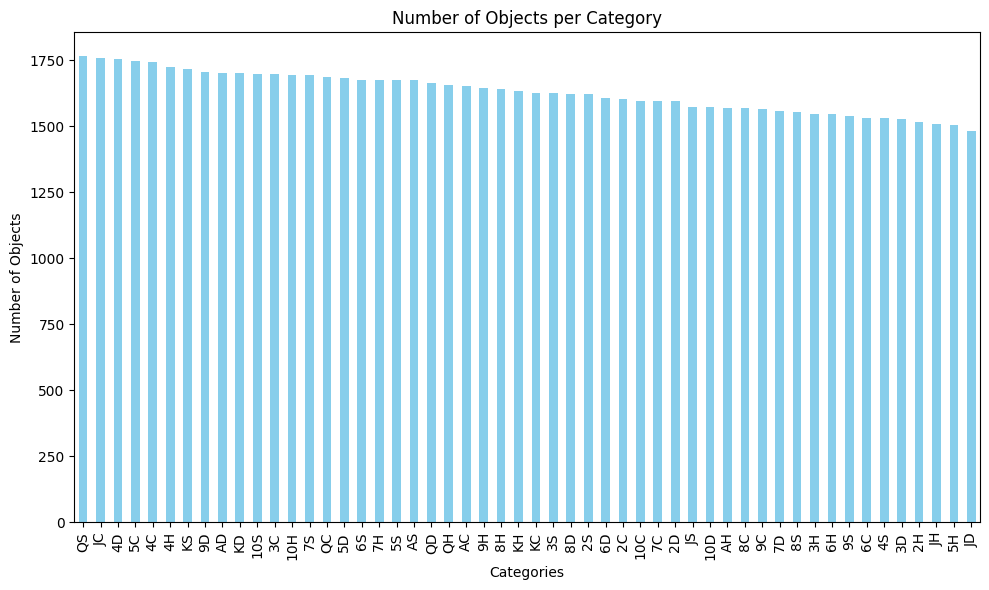

In [7]:
# Count the number of each category
category_count = df['Categories'].explode().value_counts()

# Show bar chart
plt.figure(figsize=(10, 6))
category_count.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Objects')
plt.title('Number of Objects per Category')
plt.tight_layout()
plt.show()

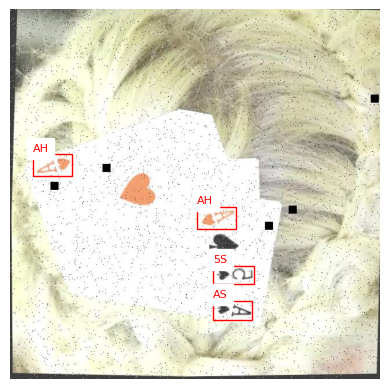

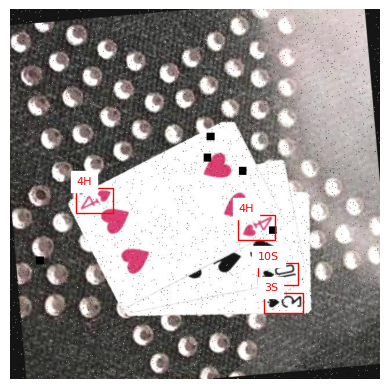

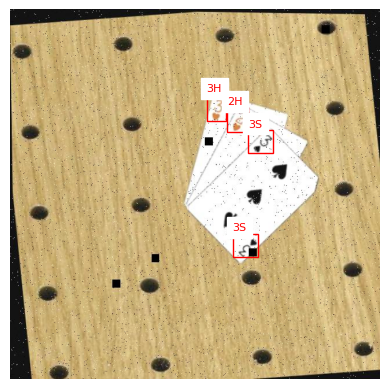

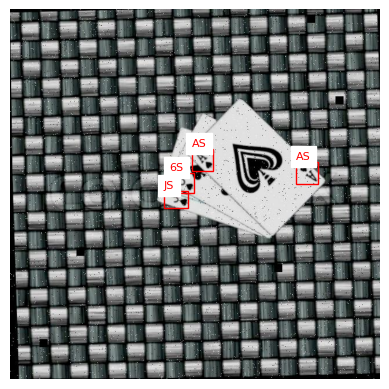

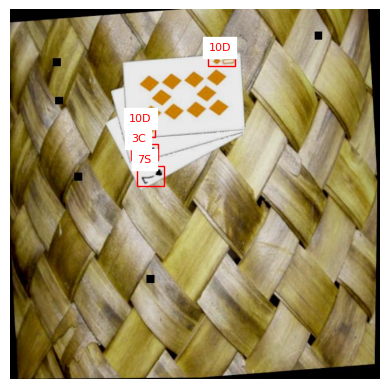

In [8]:
# Visualize some images
def visualize_image_with_annotations(image_id):
    image_info = df[df['ImageID'] == image_id].iloc[0]
    annotations = image_info['BoundingBoxes']
    image_path = os.path.join(train_imgs_path, image_info['FileName'])

    # Show image
    image = plt.imread(image_path)
    plt.imshow(image)
    
    # Draw bounding box and label on image
    for ann in annotations:
        bbox = ann
        category = image_info['Categories'][annotations.index(ann)]

        x, y, width, height = bbox
        rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(x, y - 5, category, fontsize=8, color='r', backgroundcolor='w')

    plt.axis('off')
    plt.show()

# Show some random images
for image_id in range(5):
    idx = random.randint(0, len(df)-1) 
    visualize_image_with_annotations(idx)